In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/superstore_sales.csv')

In [3]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [4]:
def extract_leading_digit(num):
    num = abs(num)  # Handle negative numbers
    while num < 1 and num != 0:
        num *= 10
    return int(str(num)[0])

df['leading_digit'] = df['Sales'].apply(extract_leading_digit)


In [5]:
df['leading_digit']

0       2
1       7
2       1
3       9
4       2
       ..
9795    3
9796    1
9797    2
9798    2
9799    1
Name: leading_digit, Length: 9800, dtype: int64

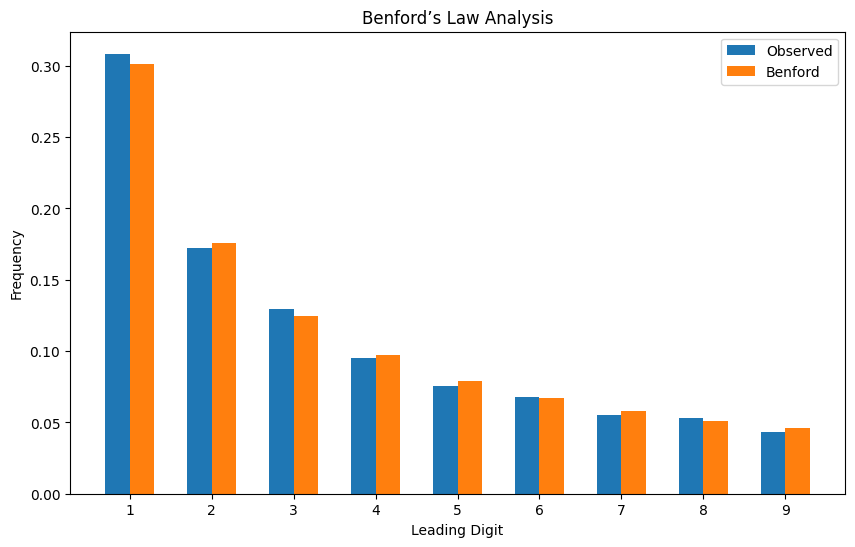

In [6]:
all_digits = pd.Series(index=np.arange(1, 10), dtype=float)
observed_frequencies = df['leading_digit'].value_counts(normalize=True)
observed_frequencies = all_digits.combine_first(observed_frequencies).fillna(0)

# Calculate expected frequencies using Benford's Law
digits = np.arange(1, 10)
expected_frequencies = np.log10(1 + 1/digits)

# Plot observed vs expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(digits - 0.15, observed_frequencies, width=0.3, label='Observed')
plt.bar(digits + 0.15, expected_frequencies, width=0.3, label='Benford')
plt.xticks(digits)
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.legend()
plt.title('Benford’s Law Analysis')
plt.show()

In [17]:
import pandas as pd
import numpy as np
import os
from openpyxl import load_workbook

# Assuming observed_frequencies and expected_frequencies are already defined

# Combine the frequencies into a DataFrame
data = pd.DataFrame({
    'Digit': np.arange(1, 10),
    'Observed Frequency': observed_frequencies,
    'Expected Frequency': expected_frequencies
})

# Path to your Excel file
file_path = 'result.xlsx'

# Check if the file exists
if os.path.exists(file_path):
    # Load the existing Excel file
    book = load_workbook(file_path)
    
    # Check if 'Benford' sheet exists
    writer = pd.ExcelWriter(file_path, engine='openpyxl')
    writer.book = book
    writer.sheets = {ws.title: ws for ws in book.worksheets}

    if 'Benford' in writer.sheets:
        # If the 'Benford' sheet exists, delete it
        del book['Benford']

else:
    # Create a new Excel writer if the file does not exist
    writer = pd.ExcelWriter(file_path, engine='openpyxl')

# Write the DataFrame to the 'Benford' sheet
data.to_excel(writer, sheet_name='Benford', index=False)

# Close the writer to save the file
writer.close()


In [10]:
expected_frequencies

array([0.30103   , 0.17609126, 0.12493874, 0.09691001, 0.07918125,
       0.06694679, 0.05799195, 0.05115252, 0.04575749])

In [12]:
from scipy.stats import chisquare
chi_statistic, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)
print(chi_statistic, p_value)

0.0009211270935466653 0.9999999999999981


In [16]:
# Chi-Square Test indicate that the observed frequencies of the leading digits in your data very closely match what is expected under Benford's Law. Here's a breakdown of the results:

# Chi-Square Statistic: 
# 0.0009211270935466653
# 0.0009211270935466653
# p-value: 
# 0.9999999999999981
# 0.9999999999999981
# Interpretation
# Chi-Square Statistic: This is extremely low, suggesting that there is very little difference between the observed frequencies and the frequencies predicted by Benford's Law.

# p-value: A p-value this high (close to 1) indicates that the differences between your observed data and the expected Benford's Law distribution are not statistically significant. In other words, your data fits Benford's Law very well.

In [13]:
MAD = np.mean(np.abs(observed_frequencies - expected_frequencies))
print(MAD)

0.003177622797444411


In [ ]:
# MAD Value: 
# 0.003177622797444411
# The MAD measures the average magnitude of deviations between the observed frequencies and the expected frequencies as per Benford's Law.
# A smaller MAD value indicates a closer fit to Benford's Law.

In [11]:
MAD = np.mean(np.abs(observed_frequencies - expected_frequencies))


1    0.308469
2    0.172347
3    0.129184
4    0.095000
5    0.075306
6    0.067959
7    0.055510
8    0.052755
9    0.043469
dtype: float64


In [14]:
from scipy.stats import ks_2samp
D_statistic, p_value = ks_2samp(observed_frequencies.cumsum(), expected_frequencies.cumsum())
print(D_statistic, p_value)

0.1111111111111111 1.0


In [ ]:
# D-statistic: This value represents the maximum distance between the cumulative distribution of your observed data and the expected distribution under Benford's Law. A smaller D-statistic indicates a closer fit. The value of approximately 
# 0.11 suggests a relatively small maximum deviation between the observed and expected distributions.

# p-value: The p-value of 1.0 is extremely high, suggesting that the observed cumulative distribution does not significantly differ from what would be expected under Benford's Law. In simpler terms, the observed data aligns well with the expected Benford distribution.

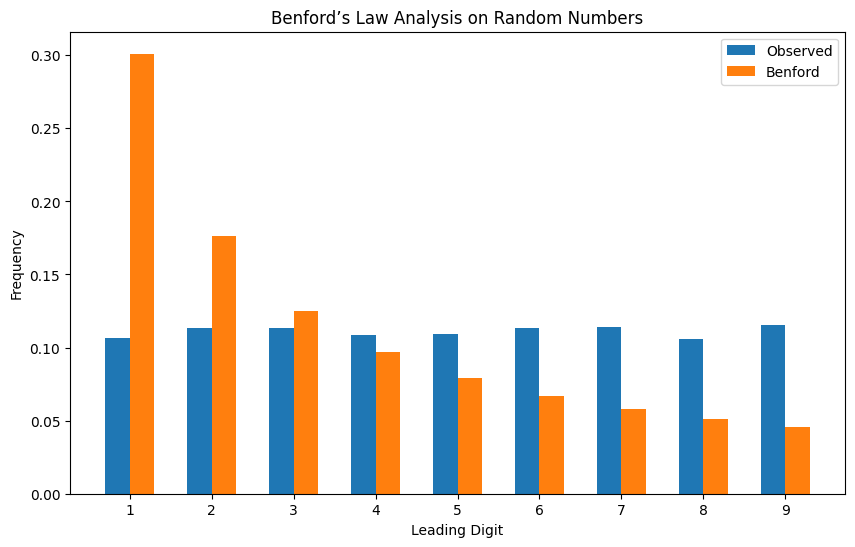

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate 10000 random numbers
random_numbers = np.random.uniform(low=1, high=10000, size=10000)

# Function to extract the leading digit
def leading_digit(num):
    while num >= 10 or num <= -10:
        num /= 10
    return int(abs(num))

# Extract leading digits
leading_digits = [leading_digit(num) for num in random_numbers]

# Convert to DataFrame for analysis
df = pd.DataFrame({'leading_digit': leading_digits})

# Calculate observed frequencies
all_digits = pd.Series(index=np.arange(1, 10), dtype=float)
observed_frequencies = df['leading_digit'].value_counts(normalize=True)
observed_frequencies = all_digits.combine_first(observed_frequencies).fillna(0)

# Calculate expected frequencies using Benford's Law
digits = np.arange(1, 10)
expected_frequencies = np.log10(1 + 1/digits)

# Plot observed vs expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(digits - 0.15, observed_frequencies, width=0.3, label='Observed')
plt.bar(digits + 0.15, expected_frequencies, width=0.3, label='Benford')
plt.xticks(digits)
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.legend()
plt.title('Benford’s Law Analysis on Random Numbers')
plt.show()
